## Exercise 4.12

Rainfall data for a city is given in the following list. 

The list contains the amount of rainfall in millimeters for the day that year
with the most rainfall.

In [1]:
import numpy as np


data = [1468, 909, 841, 475, 846, 452, 
        3830, 1397, 556, 978, 1715, 747, 
        909, 2002, 1331, 1227, 2543, 2649, 
        1781, 1717, 2718, 584, 859, 1138, 
        2675, 1872, 1359, 1544, 1372, 1334, 
        955, 1849, 719, 1737, 1389, 681, 
        1565, 701, 994, 1188, 962, 1564, 
        1800, 580, 1106, 880, 850]


In [2]:
## a) Calculate the mean of the data
mean = np.mean(data)

## b) Calculate the median of the data
median = np.median(data)

## c) Calculate the 25th percentile of the data
percentile_25 = np.percentile(data, 25)

## d) Calculate the 75th percentile of the data
percentile_75 = np.percentile(data, 75)

## e) Calculate the maximum of the data
max_val = np.max(data)

## f) Calculate the minimum of the data
min_val = np.min(data)

print(f"Mean: {mean}")
print(f"Min: {min_val}")
print(f"25th percentile: {percentile_25}")
print(f"Median: {median}")
print(f"75th percentile: {percentile_75}")
print(f"Max: {max_val}")



Mean: 1347.8297872340424
Min: 452
25th percentile: 854.5
Median: 1227.0
75th percentile: 1716.0
Max: 3830


In [3]:
median - percentile_25, percentile_75 - median

(372.5, 489.0)

The mean is above the median, and the gap from the median to the 75-th percentile is larger. So the distribution may be right skewed, if anything.

In [4]:
## Calculate the standard deviation of the data
std_dev = np.std(data)

## Estimate IQR using the standard deviation
q1_est =  -1.35/2 * std_dev + median
q3_est =  1.35/2 * std_dev + median

print(f"Standard deviation: {std_dev}")
print(f"Estimated Q1: {q1_est}")
print(f"Estimated Q3: {q3_est}")


Standard deviation: 686.2345396204128
Estimated Q1: 763.7916857562213
Estimated Q3: 1690.2083142437787


In [5]:
## Estimate the standard deviation using the IQR
iqr = percentile_75 - percentile_25
std_dev_est = iqr / 1.35

print(f"Estimated standard deviation: {std_dev_est}")

Estimated standard deviation: 638.1481481481482


In [6]:
## Compute the trimmed mean of the data
trimmed_mean_2 = np.mean(sorted(data[2:-2]))
trimmed_mean_3 = np.mean(sorted(data[3:-3]))
trimmed_mean_5 = np.mean(sorted(data[5:-5]))

print(f"Trimmed mean (2): {trimmed_mean_2}")
print(f"Trimmed mean (3): {trimmed_mean_3}")
print(f"Trimmed mean (5): {trimmed_mean_5}")

Trimmed mean (2): 1377.6976744186047
Trimmed mean (3): 1397.4146341463415
Trimmed mean (5): 1448.4594594594594


Maybe there are outliers? There's a jump from 1347 to 1448 in the mean if we trim 10% of the data off each end.

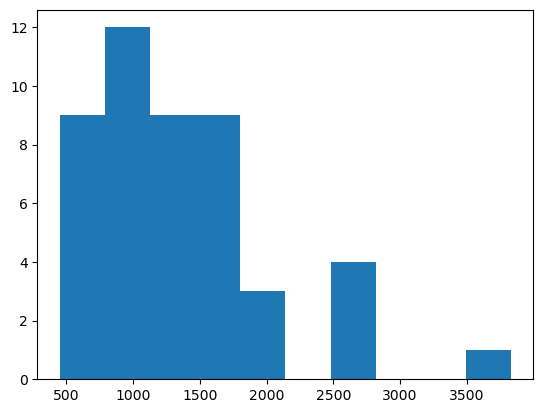

In [7]:
## plot a histogram of the data
import matplotlib.pyplot as plt
plt.hist(data, bins=10)
plt.show()


In [9]:
## Calculate the five number summary of the data
five_number_summary = np.percentile(data, [0, 25, 50, 75, 100])
print(f"Five number summary: {five_number_summary}")

Five number summary: [ 452.   854.5 1227.  1716.  3830. ]


## Exercise 14.13

In [10]:
## Make a stem and leaf plot of the data
stems = set([int(x/100) for x in data])
stems = sorted(list(stems))
for stem in stems:
    if stem < 10:
        print(f" {stem} | ", end="")
    else:
        print(f"{stem} | ", end="")
    for leaf in sorted([x for x in data if int(x/100) == stem]):
        print(f"{leaf % 100:2d}", end=" ")
    print()


 4 | 52 75 
 5 | 56 80 84 
 6 | 81 
 7 |  1 19 47 
 8 | 41 46 50 59 80 
 9 |  9  9 55 62 78 94 
11 |  6 38 88 
12 | 27 
13 | 31 34 59 72 89 97 
14 | 68 
15 | 44 64 65 
17 | 15 17 37 81 
18 |  0 49 72 
20 |  2 
25 | 43 
26 | 49 75 
27 | 18 
38 | 30 


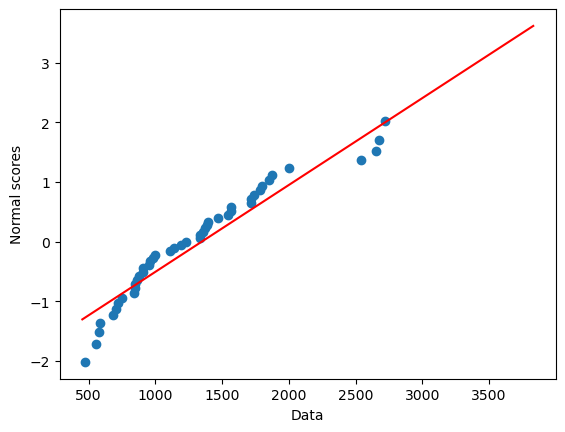

In [25]:
import scipy.stats as stats
## Create a normal plot of the data with the data values on the horizontal axis
## and the normal score on the vertical axis.
## Also, plot the line of slope 1/sigma and y-intercept -mu/sigma
data_sorted = sorted(data)
normal_scores = stats.norm.ppf(np.linspace(0, 1, len(data)))
plt.plot(data_sorted, normal_scores, "o")
plt.plot([min(data), max(data)], [min(data)/std_dev, max(data)/std_dev] - mean/std_dev, "r-")
plt.xlabel("Data")
plt.ylabel("Normal scores")

plt.show()


It looks like the data may be right skewed (which is in line with previous observations).

## Exercise 4.35

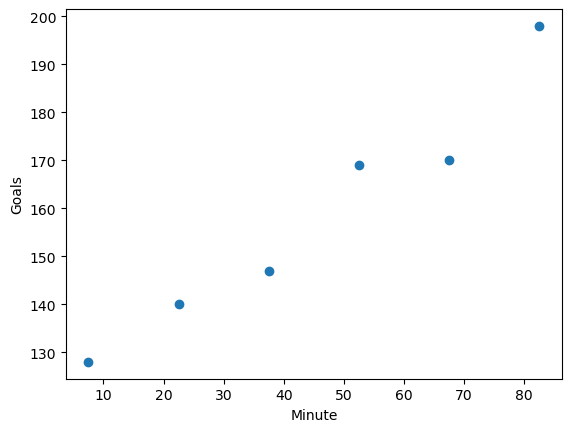

In [28]:
time_data = [7.5, 22.5, 37.5, 52.5, 67.5, 82.5]
goal_data = [128, 140, 147, 169, 170, 198]

## Make a scatter plot of the data
plt.scatter(time_data, goal_data)
plt.xlabel("Minute")
plt.ylabel("Goals")
plt.show()


The data appears to be increasing, maybe linearly?

In [29]:
## Calculate the correlation coefficient of the data
correlation = np.corrcoef(time_data, goal_data)[0, 1]
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.9750365741505286


This correlation coefficient suggests a strong positive linear relationship.